In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
import math
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

Load train and test data

In [2]:
#training Data
xtrain = pd.read_csv("train.csv")
ytrain = xtrain["target"]
xtrain.drop("target", axis = 1, inplace = True)

#load testing data
xtest = pd.read_csv("test.csv")

In [3]:
#Set up PCA

print("Setting up PCA...")
pca = PCA(n_components=12, random_state=0)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

print("PCA is done....")

print("Setting up ICA... ")
ica = FastICA(n_components=12, random_state=0)
ica_train = ica.fit_transform(xtrain)
ica_test = ica.transform(xtest)
print("ICA is done...")

Setting up PCA...
PCA is done....
Setting up ICA... 


/usr/local/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


ICA is done...


In [4]:
pca.explained_variance_

array([  1.84356725e+11,   1.08987684e+03,   3.05249223e+01,
         1.32477406e+01,   8.43690369e+00,   7.54424846e+00,
         7.34775554e+00,   6.43392977e+00,   5.44228522e+00,
         4.35754192e+00,   3.53309339e+00,   2.87242115e+00])

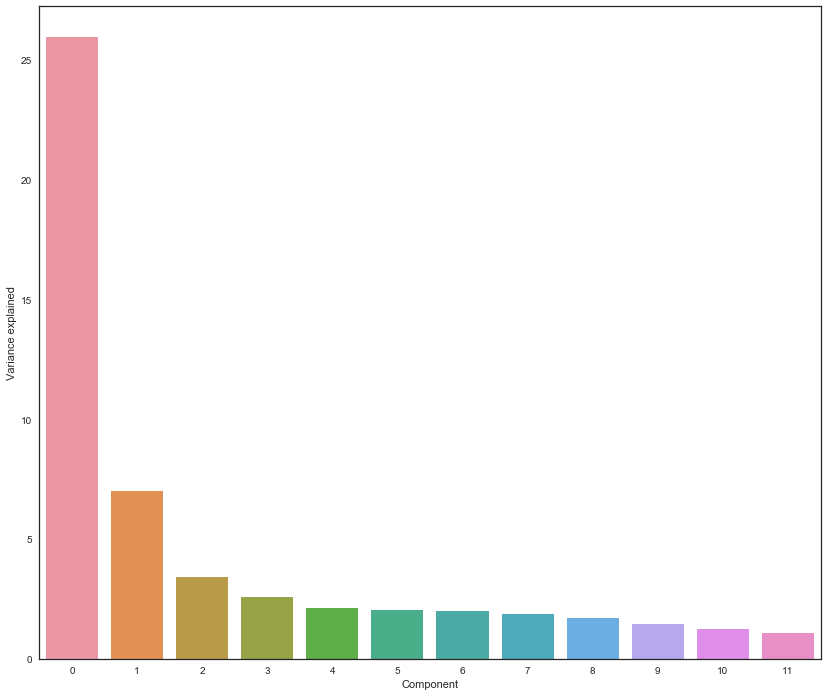

In [5]:
plt.figure(figsize=(14,12))
sns.set(style="white")
sns.barplot(x= np.arange(12), y = [math.log(i) for i in pca.explained_variance_])
plt.xlabel("Component")
plt.ylabel("Variance explained")
plt.show()

In [6]:
[i for i in pca.explained_variance_ratio_]

[0.99999999348730784,
 5.9117823173244413e-09,
 1.6557531066692479e-10,
 7.1859274454031844e-11,
 4.5764013341359889e-11,
 4.0922013580011101e-11,
 3.9856183647326957e-11,
 3.4899349168421846e-11,
 2.9520404936869957e-11,
 2.3636468321016732e-11,
 1.9164439846500733e-11,
 1.5580777578326888e-11]

Most of the variance in the data is explained by the first principal component. It explains 99.999% of the variance in this dataset.

In [7]:
xgb = XGBClassifier(n_estimators=500,max_depth=6,
                        objective="binary:logistic",
                        learning_rate=0.07, 
                        subsample=1, 
                        colsample_bytree=.5,
                        scale_pos_weight=1.7,
                        reg_alpha=0.5,
                        reg_lambda=1
                     )

In [10]:
#Lets check out xgboost on our PCA data
xgb.fit(pca_train[:,0:2], ytrain)
targ = xgb.predict_proba(pca_test[:,0:2])

In [11]:
frame = pd.DataFrame()
frame["id"] = xtest["id"]
frame["target"] = targ[:,0]

In [13]:
frame.to_csv("pca_xgboost.csv", index = False)

In [19]:
#GBM + PCA
gbm = GradientBoostingClassifier(random_state = 0, n_estimators = 500)
gbm.fit(pca_train[:,0:2], ytrain)
gbm_target = gbm.predict_proba(pca_test[:,0:2])

In [21]:
gbm_frame = pd.DataFrame()
gbm_frame["id"] = xtest["id"]
gbm_frame["target"] = gbm_target[:,0]

In [23]:
gbm_frame.to_csv("gbm_pca.csv", index = False)